In [98]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model as lm
from sklearn.model_selection import cross_val_predict, cross_val_score

In [99]:
boston = datasets.load_boston()

print(boston.DESCR[100:1300])

   :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by t

In [100]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [104]:
model = lm.LinearRegression()
prediction = cross_val_predict(model, boston.data, boston.target, cv=5)
score = cross_val_score(model, boston.data, boston.target, cv=5)

print("Accuracy: {:.2f}%".format(score.mean() * 100))

Accuracy: 35.07%


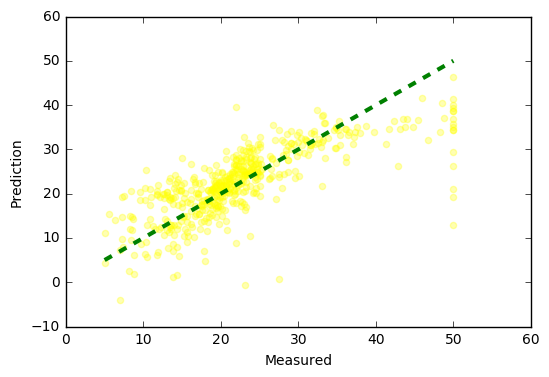

In [102]:
figure, plot = plt.subplots()

plot.scatter(boston.target, prediction, alpha=0.3, color='yellow')
plot.plot(
    [boston.target.min(), boston.target.max()],
    [boston.target.min(), boston.target.max()],
    'k--', lw=3, color='green'
)

plot.set_xlabel('Measured')
plot.set_ylabel('Prediction')

plt.show()